#DataPreProcessing

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [65]:
data=pd.read_csv('the_loan (1).csv')

In [66]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [67]:
data.shape

(614, 13)

In [68]:
data.drop('Loan_ID',axis=1,inplace=True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [70]:
data.duplicated().sum()

0

In [71]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
data_cat=data.select_dtypes(include=['object'])
data_num=data.select_dtypes(include=['number'])

In [73]:
data_cat=data_cat.fillna(data_cat.mode().iloc[0])

In [74]:
data_num=data_num.fillna(data_num.median())

In [75]:
data_cat.isna().sum()
data_num.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [76]:
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(float)

In [77]:
final_data = pd.concat([data_num, data_cat], axis=1)

In [78]:
final_data.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

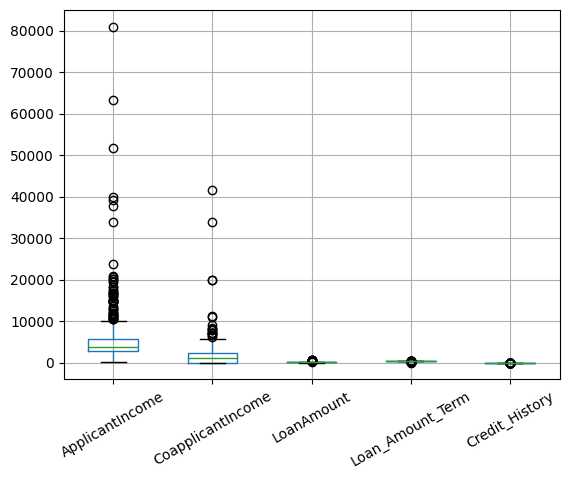

In [79]:
final_data.boxplot()
plt.xticks(rotation=30)
plt.show()

##LabelEncoder

In [80]:
label_encoder=preprocessing.LabelEncoder()
for col in final_data.columns:
  if final_data[col].dtype=='object':
    final_data[col]=label_encoder.fit_transform(final_data[col])

In [81]:
final_data['LoanAmount']=final_data['LoanAmount']*1000

In [82]:
final_data['Loan_Amount_Term']=final_data['Loan_Amount_Term']/10

In [83]:
final_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,128000.0,36.0,1.0,1,0,0,0,0,2,1
1,4583,1508.0,128000.0,36.0,1.0,1,1,1,0,0,0,0
2,3000,0.0,66000.0,36.0,1.0,1,1,0,0,1,2,1
3,2583,2358.0,120000.0,36.0,1.0,1,1,0,1,0,2,1
4,6000,0.0,141000.0,36.0,1.0,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71000.0,36.0,1.0,0,0,0,0,0,0,1
610,4106,0.0,40000.0,18.0,1.0,1,1,3,0,0,0,1
611,8072,240.0,253000.0,36.0,1.0,1,1,1,0,0,2,1
612,7583,0.0,187000.0,36.0,1.0,1,1,2,0,0,2,1


In [84]:
x=final_data.drop('Loan_Status',axis=1)
y=final_data['Loan_Status']

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [86]:
lr=LogisticRegression(max_iter=15000)
lr.fit(x_train,y_train)
lr_predy=lr.predict(x_test)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
lr_accuracy=accuracy_score(y_test,lr_predy)
lr_precision=precision_score(y_test,lr_predy)
lr_recall=recall_score(y_test,lr_predy)
lr_f1=f1_score(y_test,lr_predy)

In [88]:
KNN_clss=KNeighborsClassifier(n_neighbors=5)
KNN_clss.fit(x_train,y_train)

KNeighborsClassifier()

In [89]:
Kn_y_pred=KNN_clss.predict(x_test)
Kn_test_accuracy = accuracy_score(y_test, Kn_y_pred)
Kn_test_precision = precision_score(y_test, Kn_y_pred, average='weighted')
Kn_test_recall = recall_score(y_test, Kn_y_pred, average='weighted')
Kn_test_f1 = f1_score(y_test, Kn_y_pred, average='weighted')

In [90]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
y_pred = naive_bayes.predict(x_test)

In [91]:
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')

In [92]:
metrics = {
    'Model': ['Loggistic Regression', 'KNN', 'Naive Bayes'],
    'Test Accuracy': [lr_accuracy, Kn_test_accuracy, test_accuracy],
    'Test Precision': [lr_precision, Kn_test_precision, test_precision],
    'Recall':[lr_recall,Kn_test_recall,test_recall],
    'F1 score':[lr_f1,Kn_test_f1,test_f1]}

metrics_df = pd.DataFrame(metrics)

In [93]:
metrics_df

,Model,Test Accuracy,Test Precision,Recall,F1 score
0,Loggistic Regression,0.788618,0.759615,0.987500,0.858696
1,KNN,0.577236,0.529988,0.577236,0.542657
2,Naive Bayes,0.650407,0.601114,0.650407,0.539619


In [94]:
test_input=np.array([[35000,20000,120000,12,1,1,2,1,2,1,1]])
test_output=lr.predict(test_input)
print(test_output)

[1]


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [95]:
import pickle as p

In [96]:
with open ("logistic_model_loan.pkl","wb") as f:
    p.dump(lr,f)

In [97]:
scaler = StandardScaler()
scaler.fit(x_train)
with open("scaler.pkl", "wb") as f:
    p.dump(scaler, f)



In [98]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
83,6000,2250.0,265000.0,36.0,1.0,1,1,0,0,0,1
90,2958,2900.0,131000.0,36.0,1.0,1,1,0,0,0,1
227,6250,1695.0,210000.0,36.0,1.0,1,1,2,0,0,1
482,2083,3150.0,128000.0,36.0,1.0,1,1,0,0,0,1
464,4166,0.0,98000.0,36.0,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,1875,1875.0,97000.0,36.0,1.0,1,1,2,1,1,1
106,11417,1126.0,225000.0,36.0,1.0,1,1,2,0,0,2
270,3237,0.0,30000.0,36.0,1.0,0,0,0,0,0,2
435,10047,0.0,128000.0,24.0,1.0,0,1,0,0,0,1
